# Problem no 1(book)

In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [2]:
df=pd.read_csv('book.csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
frequent_itemset = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemset

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [4]:
rules= association_rules(frequent_itemset, metric='lift' , min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [5]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [6]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [7]:
support = pd.DataFrame(rules['support'])
print(support.to_numpy())


[[0.165 ]
 [0.165 ]
 [0.256 ]
 [0.256 ]
 [0.184 ]
 [0.184 ]
 [0.1515]
 [0.1515]
 [0.1625]
 [0.1625]
 [0.195 ]
 [0.195 ]
 [0.162 ]
 [0.162 ]
 [0.1155]
 [0.1155]
 [0.101 ]
 [0.101 ]
 [0.1205]
 [0.1205]
 [0.1875]
 [0.1875]
 [0.1525]
 [0.1525]
 [0.167 ]
 [0.167 ]
 [0.1925]
 [0.1925]
 [0.1135]
 [0.1135]
 [0.1055]
 [0.1055]
 [0.1235]
 [0.1235]
 [0.1325]
 [0.1325]
 [0.1105]
 [0.1105]
 [0.1275]
 [0.1275]
 [0.129 ]
 [0.129 ]
 [0.129 ]
 [0.129 ]
 [0.129 ]
 [0.129 ]
 [0.146 ]
 [0.146 ]
 [0.146 ]
 [0.146 ]
 [0.146 ]
 [0.146 ]
 [0.1225]
 [0.1225]
 [0.1225]
 [0.1225]
 [0.1225]
 [0.1225]
 [0.1265]
 [0.1265]
 [0.1265]
 [0.1265]
 [0.1265]
 [0.1265]
 [0.1495]
 [0.1495]
 [0.1495]
 [0.1495]
 [0.1495]
 [0.1495]
 [0.1045]
 [0.1045]
 [0.1045]
 [0.1045]
 [0.1045]
 [0.1045]
 [0.102 ]
 [0.102 ]
 [0.102 ]
 [0.102 ]
 [0.102 ]
 [0.102 ]
 [0.1015]
 [0.1015]
 [0.1015]
 [0.1015]
 [0.1015]
 [0.1015]
 [0.1085]
 [0.1085]
 [0.1085]
 [0.1085]
 [0.1085]
 [0.1085]
 [0.1035]
 [0.1035]
 [0.1035]
 [0.1035]
 [0.1035]
 [0.1035]]

In [8]:
confidence = pd.DataFrame(rules['confidence'])
print(confidence.to_numpy())


[[0.66666667]
 [0.39007092]
 [0.60520095]
 [0.59396752]
 [0.65248227]
 [0.43498818]
 [0.70629371]
 [0.35815603]
 [0.38416076]
 [0.67427386]
 [0.46099291]
 [0.70652174]
 [0.65454545]
 [0.37587007]
 [0.46666667]
 [0.40957447]
 [0.40808081]
 [0.41908714]
 [0.48686869]
 [0.4365942 ]
 [0.66489362]
 [0.4350348 ]
 [0.71095571]
 [0.35382831]
 [0.69294606]
 [0.387471  ]
 [0.69746377]
 [0.44663573]
 [0.26334107]
 [1.        ]
 [0.37411348]
 [0.49184149]
 [0.43794326]
 [0.51244813]
 [0.46985816]
 [0.48007246]
 [0.51515152]
 [0.40036232]
 [0.46195652]
 [0.52904564]
 [0.78181818]
 [0.7962963 ]
 [0.50390625]
 [0.52121212]
 [0.30496454]
 [0.29930394]
 [0.79347826]
 [0.77866667]
 [0.5703125 ]
 [0.5177305 ]
 [0.34515366]
 [0.3387471 ]
 [0.80858086]
 [0.80327869]
 [0.47851562]
 [0.57109557]
 [0.28959811]
 [0.28422274]
 [0.77846154]
 [0.49414062]
 [0.75748503]
 [0.29905437]
 [0.52489627]
 [0.29350348]
 [0.58398438]
 [0.76666667]
 [0.77662338]
 [0.3534279 ]
 [0.34686775]
 [0.54166667]
 [0.56793478]
 [0.78

<AxesSubplot:xlabel='support', ylabel='confidence'>

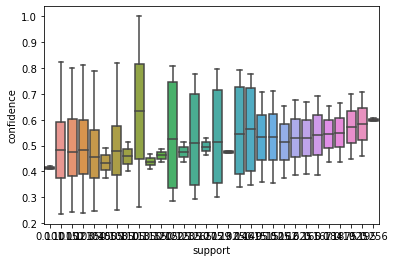

In [9]:
sns.boxplot(x='support', y='confidence', data=rules)

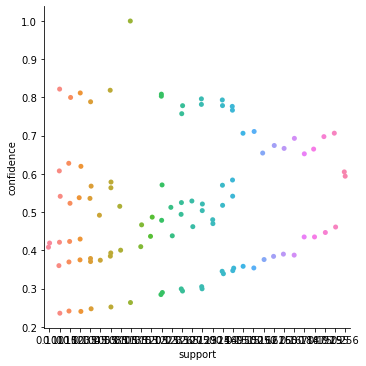

In [10]:
sns.catplot(x='support', y='confidence', data=rules)

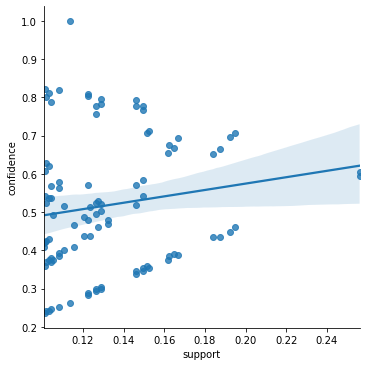

In [11]:
sns.lmplot(x='support', y='confidence', data=rules)

<AxesSubplot:xlabel='support', ylabel='confidence'>

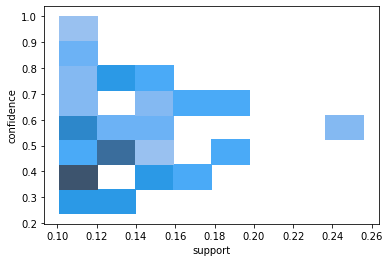

In [12]:
sns.histplot(x='support', y='confidence', data=rules)

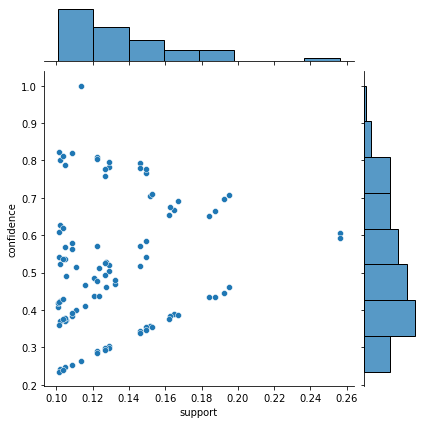

In [13]:
sns.jointplot(x='support', y='confidence', data=rules)